In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as LA
from collections import defaultdict

In [2]:
Knetwork = nx.krackhardt_kite_graph()

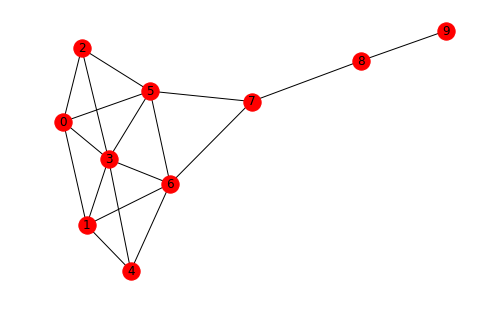

In [4]:
nx.draw(Knetwork, with_labels = True)

In [5]:
vertices_list = list(Knetwork.nodes())
store_sum = {x: 0.0 for x in vertices_list}
short_paths = defaultdict(dict)
betweenness_centrality_vector = []
avg = 0
# Get shortest paths between all pairs of vertices
for s, vertex in enumerate(vertices_list[:-1]):
    for t in vertices_list[s+1:]:
        short_paths[vertex][t] = [path for path in nx.all_shortest_paths(Knetwork, vertex, t)]

for vertex in vertices_list:
    counter = 0
    sum = 0
    for s, vertex1 in enumerate(vertices_list[:-1]):        
        for vertex2 in vertices_list[s+1:]:
            counter = 0
            avg = 0
            for path in short_paths[vertex1][vertex2]:
                if vertex in path[1:-1]:
                    counter = counter+1
                    if counter > 1:
                        sum = sum - 0.5
                    avg = avg + (1 / len(short_paths[vertex1][vertex2]))
                    sum = sum + avg
                    store_sum[vertex.real] = sum
                    
for i in store_sum.values():
    betweenness_centrality_vector.append(i)

In [6]:
print("The vector of betweenness centralities:- ")
betweenness_centrality_vector 

The vector of betweenness centralities:- 


[0.8333333333333333,
 0.8333333333333333,
 0.0,
 3.6666666666666665,
 0.0,
 8.333333333333332,
 8.333333333333332,
 14.0,
 8.0,
 0.0]